In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer

### Project Outline - Shared Document
https://docs.google.com/document/d/1gZ5QkT95D7WJ8sPUyC0qURUVcKZQrPub2nR4gyRYPkc/edit?usp=sharing

### Exploratory Data Analysis

In [3]:
hate_crime = pd.read_csv('hate_crime.csv')

#print shape and first 5 rows
print(hate_crime.shape)
hate_crime.head(5)

(219577, 28)


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
#datatypes and null count
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [5]:
#year range
hate_crime['DATA_YEAR'].agg([np.max, np.min])

amax    2020
amin    1991
Name: DATA_YEAR, dtype: int64

In [6]:
#extract Population Group Description to use later
population_groups = hate_crime[['POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC']].value_counts()
population_groups_df = pd.DataFrame(population_groups).sort_values('POPULATION_GROUP_CODE').reset_index()
population_groups_df = population_groups_df[['POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC']]
population_groups_df

,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC
0,0,"Possessions (Puerto Rico, Guam, Canal Zone, Vi..."
1,1A,"Cities 1,000,000 or over"
2,1B,"Cities from 500,000 thru 999,999"
3,1C,"Cities from 250,000 thru 499,999"
4,2,"Cities from 100,000 thru 249,999"
5,3,"Cities from 50,000 thru 99,999"
6,4,"Cities from 25,000 thru 49,999"
7,5,"Cities from 10,000 thru 24,999"
8,6,"Cities from 2,500 thru 9,999"
9,7,"Cities under 2,500"


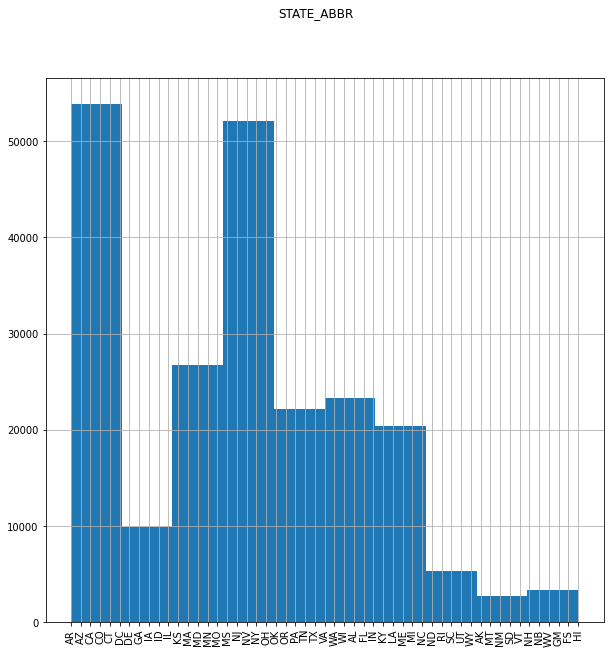

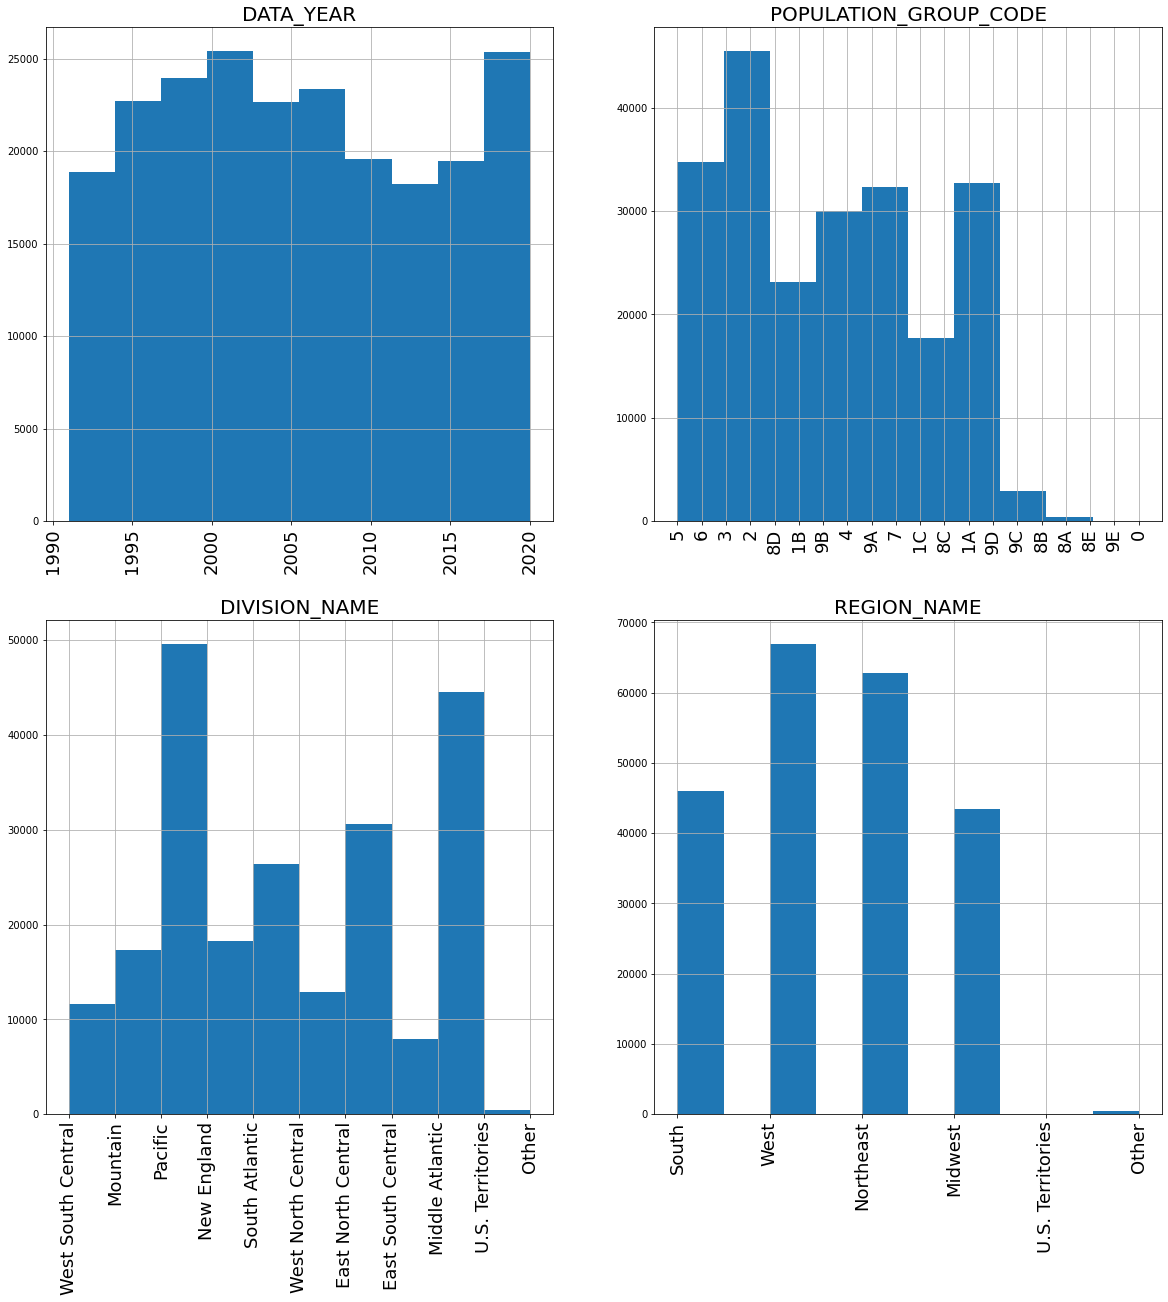

In [7]:
## Location / Population Data Exploration
fig = plt.plot()
hate_crime['STATE_ABBR'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('STATE_ABBR')
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
 
hate_crime['DATA_YEAR'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('DATA_YEAR', fontsize=20)

hate_crime['POPULATION_GROUP_CODE'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('POPULATION_GROUP_CODE', fontsize=20)

hate_crime['DIVISION_NAME'].hist(ax=axes[1,0])
plt.sca(axes[1,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('DIVISION_NAME', fontsize=20)

hate_crime['REGION_NAME'].hist(ax=axes[1,1])
plt.sca(axes[1,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('REGION_NAME', fontsize=20)

plt.show()


#Observations - States, Regions, Divisions are likley skewed by population, look at correlation with population descriptions
#US Territories and Other can be dropped from REgion/Division due to small sample size

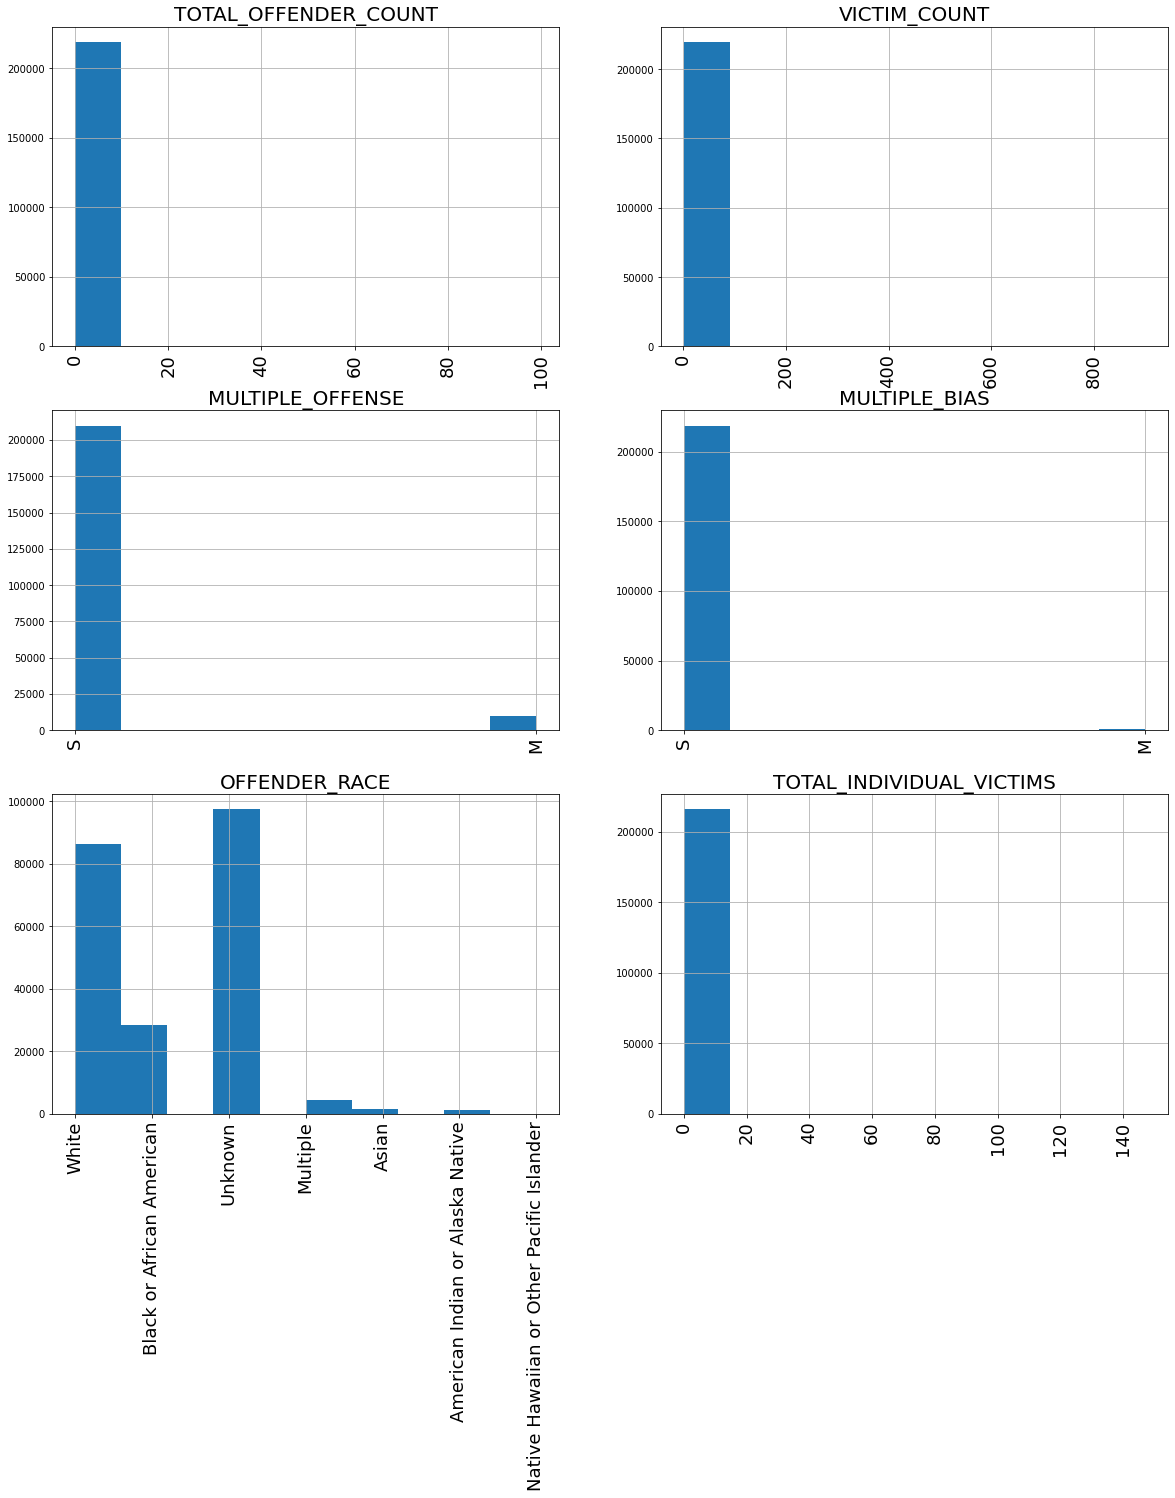

In [8]:
# OFFENDER / VICTIM DATA EXPLORATION

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

hate_crime['TOTAL_OFFENDER_COUNT'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('TOTAL_OFFENDER_COUNT', fontsize=20)

hate_crime['VICTIM_COUNT'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_COUNT', fontsize=20)


hate_crime['MULTIPLE_OFFENSE'].hist(ax=axes[1,0])
plt.sca(axes[1,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('MULTIPLE_OFFENSE', fontsize=20)

hate_crime['MULTIPLE_BIAS'].hist(ax=axes[1,1])
plt.sca(axes[1,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('MULTIPLE_BIAS', fontsize=20)


hate_crime['OFFENDER_RACE'].hist(ax=axes[2,0])
plt.sca(axes[2,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('OFFENDER_RACE', fontsize=20)

hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].hist(ax=axes[2,1])
plt.sca(axes[2,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('TOTAL_INDIVIDUAL_VICTIMS', fontsize=20)


plt.show()

##Observations - Offender and Vistim count that are much larger that average should be considered outliers and removed
#Multiple Offense/Multiple Bias have too few observations in the multiple category & should be removed
# Total_Individual_Victims and Victim_count have conflicting meaning, seems liek Victim Coiunt is more accurate, more explorationg needed

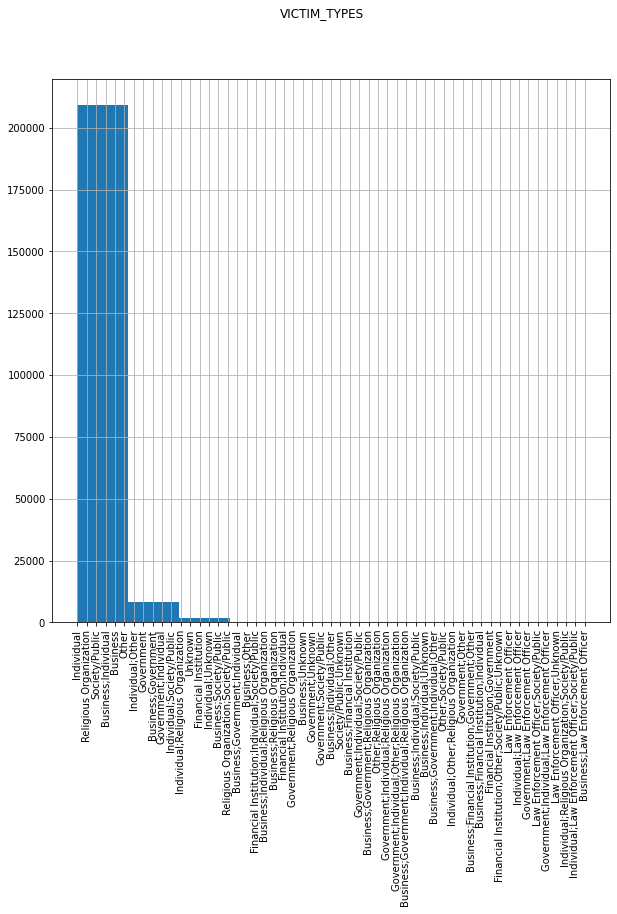

In [9]:
fig = plt.plot()
hate_crime['VICTIM_TYPES'].hist(figsize=(10,10))
plt.xticks(rotation='vertical', fontsize=10)
plt.suptitle('VICTIM_TYPES')
plt.show()

## Observations - The vast majority of categories for VICTIM_TYPE, LOCATION NAME and BIAS DESCRIPTION
 # are redundant, many categories can be combined into the top 10-15 for each column

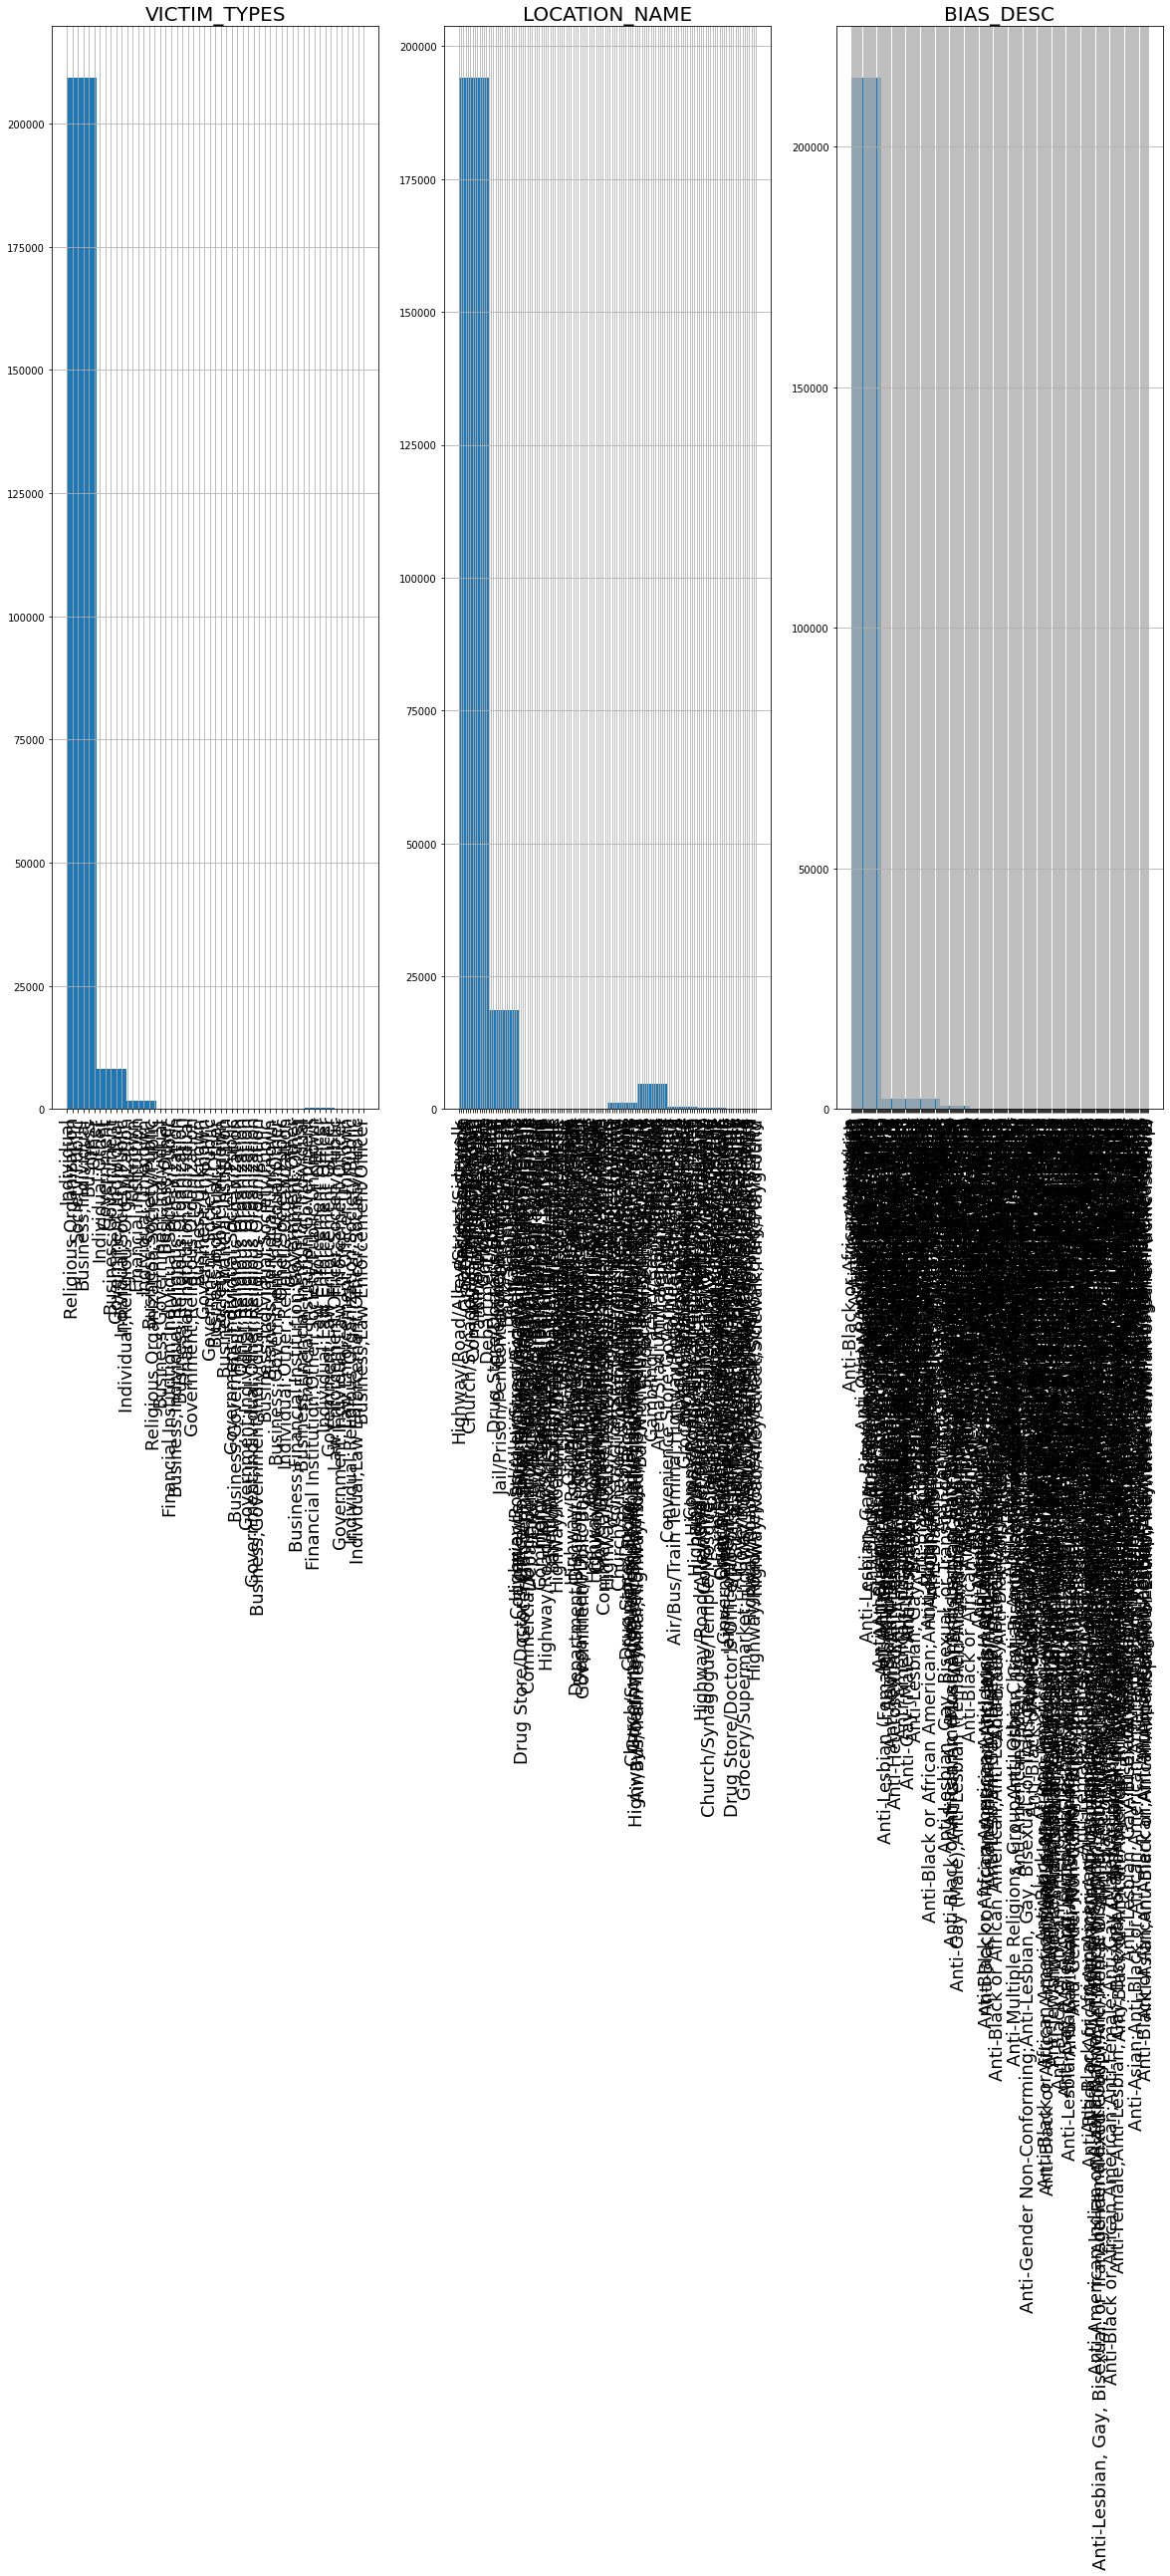

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

hate_crime['VICTIM_TYPES'].hist(ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_TYPES', fontsize=20)

hate_crime['LOCATION_NAME'].hist(ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('LOCATION_NAME', fontsize=20)

hate_crime['BIAS_DESC'].hist(ax=axes[2])
plt.sca(axes[2])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('BIAS_DESC', fontsize=20)

plt.show()

## Observations - The vast majority of categories for VICTIM_TYPE, LOCATION NAME and BIAS DESCRIPTION
 # are redundant, many categories can be combined into the top 10-15 for each column

In [11]:
# political climate csv
political = pd.read_csv('political_climate.csv')
political

,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
2,104,1995,1997,Republicans,Republicans,Democrat,Clinton,Divided
3,105,1997,1999,Republicans,Republicans,Democrat,Clinton,Divided
4,106,1999,2001,Republicans,Republicans,Democrat,Clinton,Divided
5,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided
6,108,2003,2005,Republicans,Republicans,Republican,G.W. Bush,Unified
7,109,2005,2007,Republicans,Republicans,Republican,G.W. Bush,Unified
8,110,2007,2009,Democrats,Democrats13,Republican,G.W. Bush,Divided
9,111,2009,2011,Democrats,Democrats,Democrat,Obama,Unified


### Preprocessing

In [12]:
#dropping duplicate columns like state name and unnecessary columns like Agency Name
hate_crime = hate_crime.drop(['STATE_NAME', 'POPULATION_GROUP_DESC', 'PUB_AGENCY_UNIT', 
                              'ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME', 
                              'TOTAL_INDIVIDUAL_VICTIMS','DIVISION_NAME', 'INCIDENT_ID', 
                              'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'], axis=1)
hate_crime.head(3)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR,South,5,31-AUG-91,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR,South,6,19-SEP-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR,South,3,04-JUL-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual


In [13]:
#checking null values

percent_missing = hate_crime.isnull().sum() *100/len(hate_crime)
missing_values_df = pd.DataFrame({'column_name': hate_crime.columns, 'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing', inplace = True)
display(missing_values_df)

#drop columns with more than 70% missing values
perc = 70.0
min_count = int(((100-perc)/100)*hate_crime.shape[0]+1)
hate_crime = hate_crime.dropna(axis=1, thresh=min_count)

#checking remaining missing values
hate_crime.isnull().sum()

,column_name,percent_missing
DATA_YEAR,DATA_YEAR,0.000000
LOCATION_NAME,LOCATION_NAME,0.000000
OFFENSE_NAME,OFFENSE_NAME,0.000000
VICTIM_COUNT,VICTIM_COUNT,0.000000
BIAS_DESC,BIAS_DESC,0.000000
TOTAL_OFFENDER_COUNT,TOTAL_OFFENDER_COUNT,0.000000
VICTIM_TYPES,VICTIM_TYPES,0.000000
INCIDENT_DATE,INCIDENT_DATE,0.000000
POPULATION_GROUP_CODE,POPULATION_GROUP_CODE,0.000000
REGION_NAME,REGION_NAME,0.000000


DATA_YEAR                 0
STATE_ABBR                0
REGION_NAME               0
POPULATION_GROUP_CODE     0
INCIDENT_DATE             0
TOTAL_OFFENDER_COUNT      0
OFFENDER_RACE            20
VICTIM_COUNT              0
OFFENSE_NAME              0
LOCATION_NAME             0
BIAS_DESC                 0
VICTIM_TYPES              0
dtype: int64

In [14]:
# replace null values in OFFENDER RACE column

#view unique values
unique_race_cat = hate_crime['OFFENDER_RACE'].unique()
print(unique_race_cat)

#replace nan with unknown label
hate_crime['OFFENDER_RACE'] = hate_crime['OFFENDER_RACE'].replace(np.nan, 'Unknown')
hate_crime['OFFENDER_RACE'].unique()

['White' 'Black or African American' 'Unknown' 'Multiple' 'Asian'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' nan]


array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [15]:
#verifying no missing values
hate_crime.isnull().sum()

DATA_YEAR                0
STATE_ABBR               0
REGION_NAME              0
POPULATION_GROUP_CODE    0
INCIDENT_DATE            0
TOTAL_OFFENDER_COUNT     0
OFFENDER_RACE            0
VICTIM_COUNT             0
OFFENSE_NAME             0
LOCATION_NAME            0
BIAS_DESC                0
VICTIM_TYPES             0
dtype: int64

### Transforming Datatypes

In [16]:
#convert to datetime
hate_crime["INCIDENT_DATE"] = pd.to_datetime(hate_crime["INCIDENT_DATE"])
hate_crime.dtypes

DATA_YEAR                         int64
STATE_ABBR                       object
REGION_NAME                      object
POPULATION_GROUP_CODE            object
INCIDENT_DATE            datetime64[ns]
TOTAL_OFFENDER_COUNT              int64
OFFENDER_RACE                    object
VICTIM_COUNT                      int64
OFFENSE_NAME                     object
LOCATION_NAME                    object
BIAS_DESC                        object
VICTIM_TYPES                     object
dtype: object

### Reducing Categories

In [17]:
# reducing the number of categories for the following:
print(hate_crime['VICTIM_TYPES'].unique())
print()
print(hate_crime['LOCATION_NAME'].unique())
print()
print(hate_crime['BIAS_DESC'].unique())

['Individual' 'Religious Organization' 'Society/Public'
 'Business;Individual' 'Business' 'Other' 'Individual;Other' 'Government'
 'Business;Government' 'Government;Individual' 'Individual;Society/Public'
 'Individual;Religious Organization' 'Unknown' 'Financial Institution'
 'Individual;Unknown' 'Business;Society/Public'
 'Religious Organization;Society/Public' 'Business;Government;Individual'
 'Business;Other' 'Financial Institution;Individual;Society/Public'
 'Business;Individual;Religious Organization'
 'Business;Religious Organization' 'Financial Institution;Individual'
 'Government;Religious Organization' 'Business;Unknown'
 'Government;Unknown' 'Government;Society/Public'
 'Business;Individual;Other' 'Society/Public;Unknown'
 'Business;Financial Institution' 'Government;Individual;Society/Public'
 'Business;Government;Religious Organization'
 'Other;Religious Organization'
 'Government;Individual;Religious Organization'
 'Government;Individual;Other;Religious Organization'
 'Bus

In [18]:
#reduce the number of categories for VICTIM_TYPES by condensing labels
replacements = {'VICTIM_TYPES':{r'.*Law Enforcement Officer.*':'Law Enforcement Officer', 
                                r'.*Religious Organization.*': 'Religious Organization', 
                                r'.*Business.*': 'Business', 
                                r'.*Government.*': 'Government', 
                                r'.*Individual.*': 'Individual', 
                                r'.*Society/Public.*':'Society/Public'}}
hate_crime.replace(replacements, regex=True, inplace=True)

hate_crime['VICTIM_TYPES'].value_counts()

Individual                 175934
Other                       13690
Business                    10597
Religious Organization       6442
Government                   6198
Society/Public               5075
Unknown                      1316
Law Enforcement Officer       228
Financial Institution          97
Name: VICTIM_TYPES, dtype: int64

In [17]:
#reduce the number of categories for LOCATION_NAME by condensing labels
replacements = {'LOCATION_NAME':{r'.*Highway/Road/Alley/Street/Sidewalk.*':'Highway/Road/Alley/Street/Sidewalk', 
                                 r'.*College.*': 'School-College/University', 
                                 r'.*Residence/Home.*': 'Residence/Home',
                                 r'.*Drug Store/Doctor.*': 'Drug Store/Doctor', 
                                 r'.*Commercial/Office Building.*': 'Commercial/Office Building',
                                 r'.*Restaurant.*': 'Restaurant', 
                                 r'.*Government/Public Building.*': 'Government/Public Building',
                                 r'.*Grocery/Supermarket.*': 'Grocery/Supermarket',
                                 r'.*Parking/Drop Lot/Garage.*': 'Parking/Drop Lot/Garage',
                                 r'.*Jail/Prison/Penitentiary/Corrections Facility.*': 'Jail/Prison/Penitentiary/Corrections Facility',  
                                 r'.*School-Elementary/Secondary.*': 'School-Elementary/Secondary', 
                                 r'.*Church/Synagogue/Temple/Mosque.*': 'Church/Synagogue/Temple/Mosque', 
                                 r'.*Amusement Park.*': 'Amusement Park',
                                 r'.*Bar/Nightclub.*': 'Bar/Nightclub',
                                 r'.*Air/Bus/Train Terminal.*': 'Air/Bus/Train Terminal',
                                 r'.*Department/Discount Store.*': 'Department/Discount Store',
                                 r'.*Auto Dealership New/Used.*': 'Auto Dealership New/Used'
                                }}
hate_crime.replace(replacements, regex=True, inplace=True)

hate_crime['LOCATION_NAME'].value_counts()

Residence/Home                                   65166
Highway/Road/Alley/Street/Sidewalk               41622
Other/Unknown                                    29351
School-College/University                        19027
Parking/Drop Lot/Garage                          12520
Church/Synagogue/Temple/Mosque                    8255
Commercial/Office Building                        4958
Restaurant                                        4482
Bar/Nightclub                                     3819
Government/Public Building                        3241
Convenience Store                                 2955
School-Elementary/Secondary                       2716
Specialty Store                                   2543
Air/Bus/Train Terminal                            2182
Field/Woods                                       2065
Service/Gas Station                               2038
Grocery/Supermarket                               1896
Department/Discount Store                         1744
Drug Store

In [19]:
#reduce the number of categories for BIAS_DESC by condensing labels
replacements = {'BIAS_DESC':{r'.*Anti-Black.*':'Anti-Black or African American', 
                             r'.*Anti-Jewish.*': 'Anti-Jewish', 
                             r'.*Anti-Gay.*': 'Anti-Gay (Male)',
                             r'.*Anti-Lesbian.*': 'Anti-Lesbian (Female)', 
                             r'.*Anti-Islamic.*': 'Anti-Islamic (Muslim)',
                             r'.*Anti-Hispanic.*': 'Anti-Hispanic or Latino',
                             r'.*Anti-Transgender.*': 'Anti-Transgender', 
                             r'.*Anti-Gender Non-Conforming.*': 'Anti-Gender Non-Conforming',
                             r'.*Anti-Asian.*': 'Anti-Asian',
                             r'.*Anti-Bisexual,*':'Anti-Bisexual',
                             r'.*Anti-American Indian.*': 'Anti-Native American',
                             r'.*Anti-Mental Disability.*': 'Anti-Mental Disability',
                             r'.*Anti-Physical Disability.*': 'Anti-Physical Disability',
                             r'.*Anti-Other Religion.*': 'Anti-Other Religion', 
                             r'.*Anti-Multiple Races, Group.*': 'Anti-Multiple Races, Group', 
                             r'.*Anti-Hindu.*': 'Anti-Hindu', 
                             r'.*Anti-Catholic.*': 'Anti-Catholic', 
                             r'.*Anti-Arab.*': 'Anti-Arab', 
                             r'.*Anti-Jehovah.*': 'Anti-Jehovahs Witness', 
                             r'.*Anti-White.*': 'Anti-White',
                             r'.*Anti-Multiple Religions.*': 'Anti-Multiple Religions',
                             r'.*Anti-Protestant.*': 'Anti-Protestant',
                             r'.*Anti-Native Hawaiian.*': 'Anti-Native Hawaiian or Other Pacific Islander',
                             r'.*Anti-Bisexual.*': 'Anti-Bisexual', 
                             r'.*Anti-Female.*': 'Anti-Female'
                            }}
hate_crime.replace(replacements, regex=True, inplace=True)

hate_crime['BIAS_DESC'].value_counts()

Anti-Black or African American                    75266
Anti-Jewish                                       28169
Anti-White                                        25205
Anti-Gay (Male)                                   21945
Anti-Hispanic or Latino                           14073
Anti-Lesbian (Female)                             11276
Anti-Other Race/Ethnicity/Ancestry                10772
Anti-Asian                                         6445
Anti-Multiple Races, Group                         5256
Anti-Islamic (Muslim)                              3973
Anti-Other Religion                                3536
Anti-Native American                               2385
Anti-Catholic                                      1628
Anti-Arab                                          1269
Anti-Protestant                                    1264
Anti-Multiple Religions                            1197
Anti-Mental Disability                             1193
Anti-Transgender                                

### Categorical Encoding

In [ ]:
# To be encoded:
# STATE_ABBR, REGION_NAME, POPULATION_GROUP_CODE, OFFENDER_RACE, 
# OFFENSE_NAME, LOCATION_NAME, BIAS_DESC, VICTIM_TYPES

In [20]:
for col in hate_crime:
    if (hate_crime[col].dtypes) == object:
        print(col, hate_crime[col].dtypes)

STATE_ABBR object
REGION_NAME object
POPULATION_GROUP_CODE object
OFFENDER_RACE object
OFFENSE_NAME object
LOCATION_NAME object
BIAS_DESC object
VICTIM_TYPES object


In [21]:
for col in hate_crime:
    if (hate_crime[col].dtypes) == object:
        hate_crime[col] = hate_crime[col].astype('category')
        hate_crime[col] = hate_crime[col].cat.codes     

In [22]:
hate_crime.dtypes

DATA_YEAR                         int64
STATE_ABBR                         int8
REGION_NAME                        int8
POPULATION_GROUP_CODE              int8
INCIDENT_DATE            datetime64[ns]
TOTAL_OFFENDER_COUNT              int64
OFFENDER_RACE                      int8
VICTIM_COUNT                      int64
OFFENSE_NAME                      int16
LOCATION_NAME                      int8
BIAS_DESC                          int8
VICTIM_TYPES                       int8
dtype: object

### Normalizing

In [27]:
hate_crime.describe()

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
count,219577.000000,219577.00000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,24.92082,2.443562,6.152047,0.955724,4.906702,1.247567,219.571790,29.031397,13.416551,3.162271
std,8.591466,15.20342,1.958412,4.444662,1.358364,1.374180,2.274116,99.206725,8.931027,10.147162,1.213311
min,1991.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,8.00000,1.000000,3.000000,0.000000,5.000000,1.000000,181.000000,24.000000,4.000000,3.000000
50%,2005.000000,25.00000,3.000000,5.000000,1.000000,5.000000,1.000000,266.000000,32.000000,13.000000,3.000000
75%,2013.000000,36.00000,5.000000,8.000000,1.000000,6.000000,1.000000,266.000000,35.000000,17.000000,3.000000
max,2020.000000,52.00000,5.000000,19.000000,99.000000,6.000000,900.000000,352.000000,44.000000,34.000000,8.000000


In [28]:
hate_crime_backup_df = hate_crime

In [31]:
hate_crime.drop('INCIDENT_DATE', axis=1, inplace=True)

In [32]:
normalized = Normalizer().fit_transform(hate_crime)

#turn the output array into a dataframe
normalized_df = pd.DataFrame(normalized, columns = hate_crime_backup_df.columns)
normalized_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,0.991107,0.000996,0.001493,0.003485,0.000498,0.002987,0.000498,0.132413,0.011947,0.001991,0.001493
1,0.985845,0.000990,0.001485,0.003961,0.000495,0.000990,0.000495,0.166371,0.011884,0.016340,0.001485
2,0.999837,0.001004,0.001507,0.002511,0.000502,0.001004,0.000502,0.000000,0.017576,0.002009,0.001507
3,0.999727,0.001004,0.001506,0.002511,0.000502,0.001004,0.001004,0.010545,0.012051,0.016570,0.001506
4,0.999654,0.001004,0.001506,0.002510,0.000502,0.001004,0.000502,0.000000,0.020083,0.016569,0.001506
...,...,...,...,...,...,...,...,...,...,...,...
219572,0.990943,0.025509,0.002453,0.003434,0.002943,0.002943,0.000981,0.130490,0.015698,0.008340,0.001472
219573,0.995414,0.025625,0.002464,0.003449,0.000000,0.002464,0.000493,0.089193,0.015769,0.016262,0.000986
219574,0.999375,0.025726,0.002474,0.003463,0.000495,0.000989,0.000495,0.000000,0.017316,0.016326,0.001484
219575,0.985963,0.025381,0.002441,0.003417,0.000488,0.002929,0.000488,0.164002,0.017084,0.003905,0.001464


In [33]:
normalized_df.describe()

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,0.992627,0.012333,0.001210,0.003045,0.000473,0.002429,0.000617,0.108466,0.014370,0.006640,0.001566
std,0.004488,0.007522,0.000969,0.002201,0.000674,0.000680,0.001052,0.048734,0.004422,0.005021,0.000603
min,0.906744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000487,0.000000,0.000000,0.000000,0.000000
25%,0.990828,0.003975,0.000493,0.001474,0.000000,0.002467,0.000493,0.089702,0.011873,0.001985,0.001476
50%,0.991233,0.012337,0.001469,0.002489,0.000492,0.002488,0.000496,0.130629,0.015774,0.006365,0.001485
75%,0.995735,0.018001,0.002460,0.003949,0.000497,0.002960,0.000499,0.132296,0.017371,0.008461,0.001493
max,0.999992,0.026078,0.002511,0.009452,0.049387,0.003014,0.403995,0.173157,0.021774,0.016774,0.004003
